In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import geopandas
from shapely.geometry import Point
world = geopandas.read_file('../geopandas/world_m.shp')
world = world.to_crs(epsg=4326)

df = pd.read_csv('../csv/NOW_dataframe_cleaned.csv', index_col=0)
speciesFirstOccurrence = pd.read_csv('../csv/speciesFirstOccurrence.csv', index_col=0)
speciesLastOccurrence = pd.read_csv('../csv/speciesLastOccurrence.csv', index_col=0)

pd.set_option('max_columns',100)

In [2]:
def isPointOnLand(point):
    value = False
    for ix in world.index:
        if point.within(world.loc[ix,'geometry']):
            value = True            
            break 
    return value

In [3]:
columnLabels = ['LONG','LAT']
gridFeatures = pd.DataFrame(columns=columnLabels)

tic = time.clock()
for lat in np.arange(35,60.1,0.1):
    for long in np.arange(-11,40.1,0.1):
        point = Point(long,lat)
        if isPointOnLand(point):
            newRow = pd.DataFrame(np.array([[long,lat]]),columns=columnLabels)
            gridFeatures = gridFeatures.append(newRow, ignore_index=True)

toc = time.clock() 
display('Time elapsed: ' + str((toc-tic)/60) + ' minutes.')  
display(gridFeatures.head())
display(gridFeatures.shape)

'Time elapsed: 10.632907033333334 minutes.'

,LONG,LAT
0,-6.3,35.0
1,-6.2,35.0
2,-6.1,35.0
3,-6.0,35.0
4,-5.9,35.0


(79936, 2)

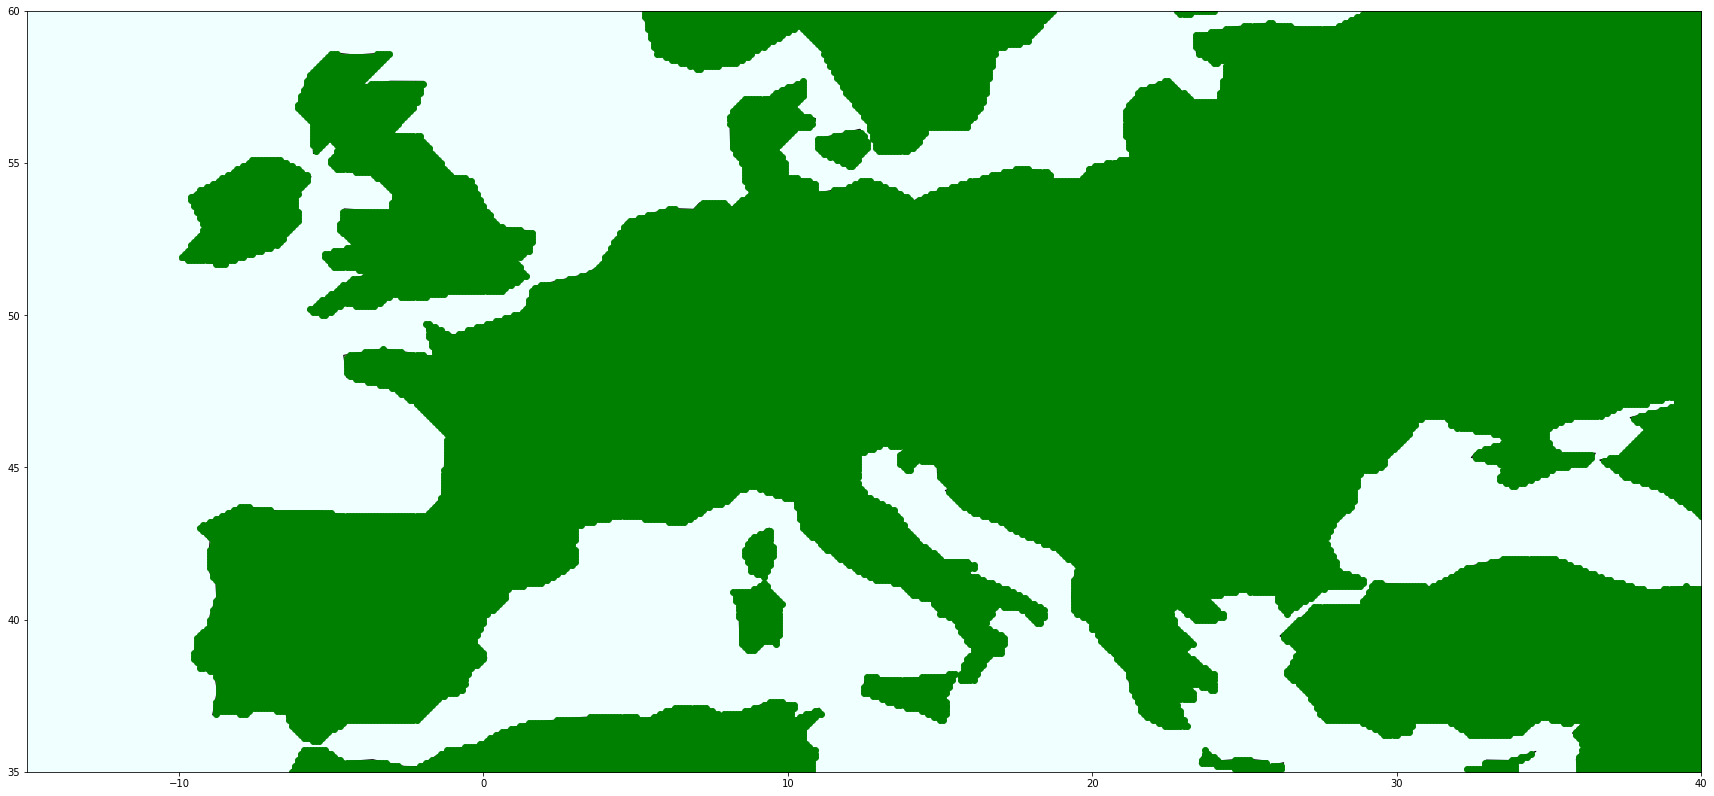

In [4]:
myMap = world.cx[:,:]

fig, ax = plt.subplots(figsize=(30,15))
myMap.plot(ax=ax, color='wheat', edgecolor='black')

# plot occurrence coordinates
x = gridFeatures['LONG']
y = gridFeatures['LAT']
plt.scatter(x, y, color='green')

plt.xlim((-15,40))
plt.ylim((35,60))
ax.set_facecolor('azure')
plt.show()

In [5]:
stepsize = 5
display(gridFeatures.loc[::stepsize,['LONG','LAT']].shape)
display(gridFeatures.loc[::stepsize,['LONG','LAT']].head())

(15988, 2)

,LONG,LAT
0,-6.3,35.0
5,-5.8,35.0
10,-5.3,35.0
15,-4.8,35.0
20,-4.3,35.0


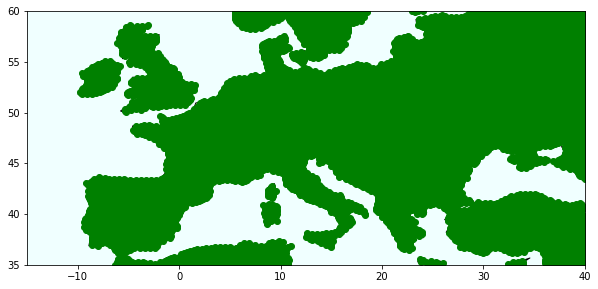

In [6]:
stepsize = 5

myMap = world.cx[:,:]

#fig, ax = plt.subplots(figsize=(30,15))
fig, ax = plt.subplots(figsize=(10,5))
myMap.plot(ax=ax, color='wheat', edgecolor='black')

# plot occurrence coordinates
x = gridFeatures.loc[::stepsize,'LONG']
y = gridFeatures.loc[::stepsize,'LAT']
plt.scatter(x, y, color='green')

plt.xlim((-15,40))
plt.ylim((35,60))
ax.set_facecolor('azure')
plt.show()

In [7]:
gridFeatures.to_csv('../csv/gridFeatures.csv')